# London Fire Incidents Analysis

In [1]:
# Extract the zip file
!pip install patool
import patoolib
import os
if (os.path.isdir("archive")) == False:
    patoolib.extract_archive('./archive.zip')
    print("\nExtract complete")
else:
    print("\nFiles Already Extracted")



Files Already Extracted


In [2]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the data
LFB_data = pd.read_csv("./archive/lfb_incident.csv")
LFB_data.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,235138081,01 Jan 2009,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,...,319.0,Battersea,342.0,Clapham,2.0,2.0,2.0,1.0,255.0,1.0
1,1091,01 Jan 2009,2009,00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2091,01 Jan 2009,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,...,308.0,Edmonton,NaN,NaN,1.0,1.0,1.0,1.0,255.0,2.0
3,3091,01 Jan 2009,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),...,210.0,Hillingdon,NaN,NaN,1.0,1.0,1.0,1.0,255.0,2.0
4,5091,01 Jan 2009,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,...,233.0,Holloway,250.0,Holloway,1.0,2.0,2.0,1.0,255.0,1.0


In [4]:
LFB_data.shape

(1465060, 39)

In [5]:
LFB_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465060 entries, 0 to 1465059
Data columns (total 39 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   IncidentNumber                          1465060 non-null  object 
 1   DateOfCall                              1465060 non-null  object 
 2   CalYear                                 1465060 non-null  int64  
 3   TimeOfCall                              1465060 non-null  object 
 4   HourOfCall                              1465060 non-null  int64  
 5   IncidentGroup                           1465060 non-null  object 
 6   StopCodeDescription                     1465060 non-null  object 
 7   SpecialServiceType                      459204 non-null   object 
 8   PropertyCategory                        1465060 non-null  object 
 9   PropertyType                            1465060 non-null  object 
 10  AddressQualifier              

###### Lets Clean the data.

Yellow - Missing Values
Blue - Non Missing


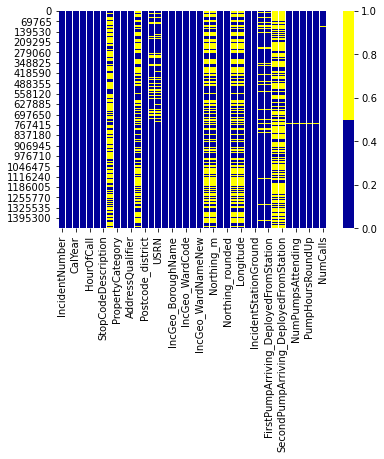

In [6]:
# Lets see if the data has missing values.
cols = LFB_data.columns[:]
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(LFB_data[cols].isnull(), cmap=sns.color_palette(colours))
print("Yellow - Missing Values\nBlue - Non Missing")

In [9]:
# Dividing the data into numerical and categorical for easier cleaning
# select numeric columns
df_numeric = LFB_data.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)


['CalYear' 'HourOfCall' 'UPRN' 'USRN' 'Easting_m' 'Northing_m'
 'Easting_rounded' 'Northing_rounded' 'Latitude' 'Longitude'
 'FirstPumpArriving_AttendanceTime' 'SecondPumpArriving_AttendanceTime'
 'NumStationsWithPumpsAttending' 'NumPumpsAttending' 'PumpCount'
 'PumpHoursRoundUp' 'Notional Cost (£)' 'NumCalls']


In [10]:

# select non numeric columns
df_categorical = LFB_data.select_dtypes(exclude=[np.number])
non_numeric_cols = df_categorical.columns.values
print(non_numeric_cols)

['IncidentNumber' 'DateOfCall' 'TimeOfCall' 'IncidentGroup'
 'StopCodeDescription' 'SpecialServiceType' 'PropertyCategory'
 'PropertyType' 'AddressQualifier' 'Postcode_full' 'Postcode_district'
 'IncGeo_BoroughCode' 'IncGeo_BoroughName' 'ProperCase' 'IncGeo_WardCode'
 'IncGeo_WardName' 'IncGeo_WardNameNew' 'FRS' 'IncidentStationGround'
 'FirstPumpArriving_DeployedFromStation'
 'SecondPumpArriving_DeployedFromStation']
